In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from regression import Learner, sine_function

In [3]:
use_gpu = False
if use_gpu:
    device = 'cuda'
    os.environ["CUDA_VISIBLE_DEVICES"] = '0'
else:
    device = 'cpu'

In [42]:
amplitude = 4.8
phase = -np.pi

# range from -5 to 5
x_range = np.arange(-5, 5, 0.01)
y_range = [sine_function(amplitude, phase, xi) for xi in x_range]

# observation
# x = [1.5, 2.2, 3.1, 3.8, 4.5]
x = [1.1, 2.4, 3.0, 3.9, 4.6]
y = [sine_function(amplitude, phase, xi) for xi in x]

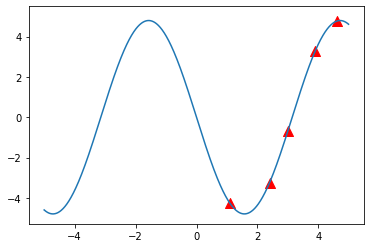

In [43]:
plt.plot(x_range, y_range)
plt.scatter(x, y, c='red', s=100, marker='^')

In [44]:
reg_learner = Learner(hidden_size=40, device=device)
loadpath = "trained_models/reg_model_exp1.pt"
reg_learner.load_state_dict(torch.load(loadpath))
reg_learner.eval()

Learner()

In [45]:
lr_a = 0.01
mse_criterion = nn.MSELoss(reduction='mean')

In [46]:
X_input = torch.tensor(x_range, dtype=torch.float).to(device)
X_input = X_input.unsqueeze(-1)

X_observed = torch.tensor(x, dtype=torch.float).to(device)
X_observed = X_observed.unsqueeze(-1)

Y_observed = torch.tensor(y, dtype=torch.float).to(device)
Y_observed = Y_observed.unsqueeze(-1)

# pre-update Y_pred1
Y_pred1 = reg_learner.forward(X_input)
y_pred1 = Y_pred1.detach().numpy()

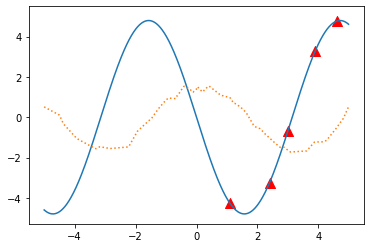

In [47]:
plt.plot(x_range, y_range)
plt.plot(x_range, y_pred1, ls=':')
plt.scatter(x, y, c='red', s=100, marker='^')

In [81]:
optimizer = torch.optim.SGD(reg_learner.parameters(), lr=lr_a*0.75)
optimizer.zero_grad()

In [82]:
num_grad_step = 1
reg_learner.load_state_dict(torch.load(loadpath))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()

    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred2 = reg_learner.forward(X_input)
y_pred2 = Y_pred2.detach().numpy()

tensor(16.3477, grad_fn=<MseLossBackward>)


In [83]:
num_grad_step = 10
reg_learner.load_state_dict(torch.load(loadpath))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()

    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred3 = reg_learner.forward(X_input)
y_pred3 = Y_pred3.detach().numpy()

tensor(16.3477, grad_fn=<MseLossBackward>)
tensor(0.8350, grad_fn=<MseLossBackward>)
tensor(2.9989, grad_fn=<MseLossBackward>)
tensor(2.7597, grad_fn=<MseLossBackward>)
tensor(1.6463, grad_fn=<MseLossBackward>)
tensor(0.4699, grad_fn=<MseLossBackward>)
tensor(0.1828, grad_fn=<MseLossBackward>)
tensor(0.1037, grad_fn=<MseLossBackward>)
tensor(0.0565, grad_fn=<MseLossBackward>)
tensor(0.0351, grad_fn=<MseLossBackward>)


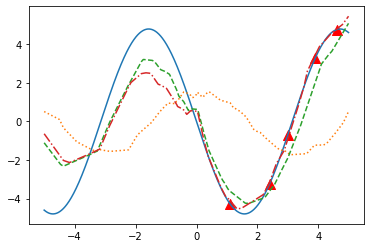

In [84]:
plt.plot(x_range, y_range)
plt.plot(x_range, y_pred1, ls=':')
plt.plot(x_range, y_pred2, ls='--')
plt.plot(x_range, y_pred3, ls='-.')
plt.scatter(x, y, c='red', s=100, marker='^')

## MAML K = 10

In [90]:
# observation
amplitude = 2.2
phase = -3

# range from -5 to 5
x_range = np.arange(-5, 5, 0.01)
y_range = [sine_function(amplitude, phase, xi) for xi in x_range]

x = [-4.3, -3.9, -2.9, -2.2, -2.1, -1, 0.1, 0.8, 1.5, 2.2]
y = [sine_function(amplitude, phase, xi) for xi in x]

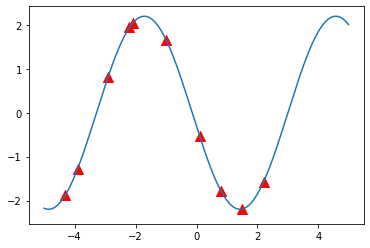

In [91]:
plt.plot(x_range, y_range)
plt.scatter(x, y, c='red', s=100, marker='^')

In [92]:
X_input = torch.tensor(x_range, dtype=torch.float).to(device)
X_input = X_input.unsqueeze(-1)

X_observed = torch.tensor(x, dtype=torch.float).to(device)
X_observed = X_observed.unsqueeze(-1)

Y_observed = torch.tensor(y, dtype=torch.float).to(device)
Y_observed = Y_observed.unsqueeze(-1)

# pre-update Y_pred1
reg_learner.load_state_dict(torch.load(loadpath))
Y_pred1 = reg_learner.forward(X_input)
y_pred1 = Y_pred1.detach().numpy()

In [93]:
num_grad_step = 1
reg_learner.load_state_dict(torch.load(loadpath))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_loss.backward()

    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred2 = reg_learner.forward(X_input)
y_pred2 = Y_pred2.detach().numpy()

tensor(4.8977, grad_fn=<MseLossBackward>)


In [94]:
mse_error_maml = []
num_grad_step = 10
reg_learner.load_state_dict(torch.load(loadpath))
for step in range(num_grad_step):
    Yout = reg_learner(X_observed)
    mse_loss = mse_criterion(Yout, Y_observed)
    print(mse_loss)
    mse_error_maml.append(mse_loss.item())
    mse_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
# after grad_update
Y_pred3 = reg_learner.forward(X_input)
y_pred3 = Y_pred3.detach().numpy()

tensor(4.8977, grad_fn=<MseLossBackward>)
tensor(0.3851, grad_fn=<MseLossBackward>)
tensor(0.2761, grad_fn=<MseLossBackward>)
tensor(0.2276, grad_fn=<MseLossBackward>)
tensor(0.1982, grad_fn=<MseLossBackward>)
tensor(0.1735, grad_fn=<MseLossBackward>)
tensor(0.1525, grad_fn=<MseLossBackward>)
tensor(0.1350, grad_fn=<MseLossBackward>)
tensor(0.1204, grad_fn=<MseLossBackward>)
tensor(0.1075, grad_fn=<MseLossBackward>)


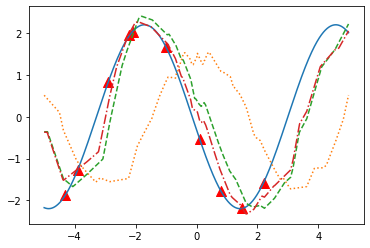

In [95]:
plt.plot(x_range, y_range)
plt.plot(x_range, y_pred1, ls=':')
plt.plot(x_range, y_pred2, ls='--')
plt.plot(x_range, y_pred3, ls='-.')
plt.scatter(x, y, c='red', s=100, marker='^')

AttributeError: 'function' object has no attribute 'grid'

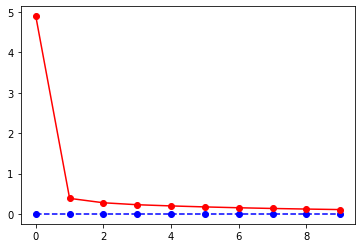

In [107]:
iter_x = [x for x in range(10)]
mse_error_oracle = [0 for _ in range(10)]
plt.plot(iter_x, mse_error_oracle, 'bo--')
plt.plot(iter_x, mse_error_maml, 'ro-')
plt.plot.grid()